# 1 - Libraries

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import scipy.stats as scs
!pip install PyPortfolioOpt
from pypfopt import EfficientFrontier, expected_returns, risk_models, plotting

# 2 - Collecting and filtering data

## 2.1 - Stocks

In [ ]:
tickers = ["AAPL", "GOOGL", "MSFT", "TSLA", "F", "AMZN", "MRVL", "AMD", "INTC", "NVDA", "BAC", "T", "GM", "NFLX", "CMCSA", "MU", "GPS", "CCL", "JPM", 'DIS']  # List of ticker symbols

# Retrieving historical data for the specified tickers
raw = yf.download(tickers, start="2018-01-01", end="2023-05-26")

stocks = pd.DataFrame(data = raw['Adj Close']) # Create a df with only Adj closing values
stocks



[*********************100%***********************]  20 of 20 completed


,AAPL,AMD,AMZN,BAC,CCL,CMCSA,DIS,F,GM,GOOGL,GPS,INTC,JPM,MRVL,MSFT,MU,NFLX,NVDA,T,TSLA
Date,,,,,,,,,,,,,,,,,,,,
2018-01-02,40.831589,10.980000,59.450500,26.421574,61.440411,36.470013,108.726059,9.749653,37.708084,53.660500,28.234150,40.132050,91.977730,21.316805,80.562050,43.141163,201.070007,49.321198,18.731646,21.368668
2018-01-03,40.824482,11.550000,60.209999,26.333206,61.578484,35.883926,109.192848,9.826662,38.628242,54.576000,27.650629,38.770039,92.071465,21.979351,80.936981,44.435299,205.050003,52.567204,18.299084,21.150000
2018-01-04,41.014111,12.120000,60.479500,26.677839,61.532455,36.114803,109.144241,9.996087,39.819031,54.787998,27.292183,38.059052,93.390434,22.478668,81.649338,46.312294,205.630005,52.844307,18.469193,20.974667
2018-01-05,41.481075,11.880000,61.457001,26.801548,61.026215,36.443371,108.551003,10.165512,39.701752,55.514500,27.133797,38.324612,92.790901,22.084980,82.661636,45.245369,209.990005,53.292118,18.537235,21.105333
2018-01-08,41.326996,12.280000,62.343498,26.615980,60.796093,35.946091,106.994995,10.127007,39.891201,55.710499,26.925394,38.324612,92.927925,22.248217,82.745995,44.998398,212.050003,54.925026,18.590700,22.427334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-19,175.160004,105.820000,116.250000,27.887468,10.940000,41.180000,91.349998,11.650000,32.569305,122.760002,7.780000,29.930000,139.179993,45.459999,318.339996,68.169998,365.359985,312.607666,16.309999,180.139999
2023-05-22,174.199997,108.000000,115.010002,28.115646,11.220000,41.240002,91.820000,11.630000,32.768749,125.050003,7.950000,30.280001,138.029999,46.439999,321.179993,66.230003,363.010010,311.727753,16.379999,188.869995
2023-05-23,171.559998,108.120003,114.989998,28.353746,11.040000,40.380001,89.820000,11.730000,33.327194,122.559998,7.600000,29.510000,136.589996,46.590000,315.260010,66.010002,355.989990,306.848236,16.100000,185.770004


In [ ]:
# Creating dfs for the analised businesses

# For Nvidia
nvda = pd.DataFrame(data = stocks['NVDA'])# df for nvidia
nvda.rename(columns={'NVDA': 'price'}, inplace = True)# renaming price column
nvda['return'] = nvda['price'].pct_change() * 100 #calculating returns

# For AMD
amd = pd.DataFrame(data = stocks['AMD'])# df for amd
amd['return'] = (amd['AMD'] - amd['AMD'].shift(1)) / amd['AMD'].shift(1) * 100 # calculating returns
amd.rename(columns={'AMD': 'price'}, inplace = True)# renaming price column

# For all the 20 stocks
stocksret = stocks.pct_change()

#print(nvda)
#print(amd)
#print(stocksr)

In [ ]:
# Checking for missing values
def get_rows_with_missing_values(df):
    return df[df.isnull().any(axis=1)]

print(get_rows_with_missing_values(nvda))
print(get_rows_with_missing_values(amd))
print(get_rows_with_missing_values(stocksret))
# conclusion: the only missing values in the dfs are the first row of return column wich should happen by definition


                price  return
Date                         
2018-01-02  49.321194     NaN
            price  return
Date                     
2018-01-02  10.98     NaN
            AAPL  AMD  AMZN  BAC  CCL  CMCSA  DIS   F  GM  GOOGL  GPS  INTC  \
Date                                                                          
2018-01-02   NaN  NaN   NaN  NaN  NaN    NaN  NaN NaN NaN    NaN  NaN   NaN   

            JPM  MRVL  MSFT  MU  NFLX  NVDA   T  TSLA  
Date                                                   
2018-01-02  NaN   NaN   NaN NaN   NaN   NaN NaN   NaN  


In [ ]:
# Returns dfs
#Nvidia
nvdar = pd.DataFrame(data = nvda['return'].drop(['2018-01-02']))
#AMD
amdr = pd.DataFrame(data = amd['return'].drop(['2018-01-02']))
# All 20 stocks
stocksr = (stocks.pct_change()).drop(['2018-01-02'])

#print(nvdar)
#print(amdr)
#print(stocksr)

## 2.2 - Risk Free

In [ ]:
# Importing the data base wich contains the CBOT 30-DAY Federal Fund Futures prices
fff_30d = pd.read_csv('/content/CBOT 30-DAY Federal Fund Futures Futuros - Dados Históricos.csv')
fff_30d

,Data,Último,Abertura,Máxima,Mínima,Var%
0,02.01.2018,"98,5900","98,5900","98,5900","98,5900","-0,11%"
1,03.01.2018,"98,5900","98,5900","98,5900","98,5900","0,00%"
2,04.01.2018,"98,5900","98,5900","98,5900","98,5900","0,00%"
3,05.01.2018,"98,5900","98,5900","98,5900","98,5800","0,00%"
4,08.01.2018,"98,5900","98,5900","98,5900","98,5800","0,00%"
...,...,...,...,...,...,...
1368,22.05.2023,"94,9425","94,9450","94,9450","94,9425","0,00%"
1369,23.05.2023,"94,9425","94,9425","94,9450","94,9425","0,00%"
1370,24.05.2023,"94,9425","94,9450","94,9450","94,9425","0,00%"
1371,25.05.2023,"94,9450","94,9425","94,9450","94,9425","0,00%"


In [ ]:
# Changing the date format to the desired format
fff_30d['Data'] = pd.to_datetime(fff_30d['Data'], format='%d.%m.%Y').dt.strftime('%Y-%m-%d')
fff_30d['Data']

0       2018-01-02
1       2018-01-03
2       2018-01-04
3       2018-01-05
4       2018-01-08
           ...    
1368    2023-05-22
1369    2023-05-23
1370    2023-05-24
1371    2023-05-25
1372    2023-05-26
Name: Data, Length: 1373, dtype: object

In [ ]:
# Creating the Risk Free dataframe
rf = pd.DataFrame(data = fff_30d['Último'].astype(str).str.replace(',', '.').astype(float))
rf.set_index(fff_30d['Data'], inplace = True)
rf.rename(columns={'Último' : 'close'}, inplace = True)
rf.index.name = 'date'
rf['close'] = (100 - rf['close'])/100 # The rf rate will be the implicit rate on the 30-DAY Federal Fund Futures, which is 100 - closing price.
#rf

## 2.3 - Market Portfolio

In [ ]:
sp500 = yf.download('^GSPc', start="2018-01-01", end="2023-05-26")
sp500 = pd.DataFrame(sp500['Adj Close'])
sp500

[*********************100%***********************]  1 of 1 completed


,Adj Close
Date,
2018-01-02,2695.810059
2018-01-03,2713.060059
2018-01-04,2723.989990
2018-01-05,2743.149902
2018-01-08,2747.709961
...,...
2023-05-19,4191.979980
2023-05-22,4192.629883
2023-05-23,4145.580078


In [ ]:
# Checking for nans
print(get_rows_with_missing_values(sp500))
# conclusion: there are no nans

Empty DataFrame
Columns: [Adj Close]
Index: []


In [ ]:
sp500r = sp500.pct_change().dropna()
#sp500r

# 3 - Graphics plots

## 3.1 - Nvidia returns plot

In [ ]:
# Creating a trace for nvidia line plot
nvdatrace = go.Scatter(
    x=nvdar.index,
    y=nvdar['return'],
    mode='lines',
    name='Nvidia returns',
    line=dict(color='green', width=2),
)

# Creating the layout for nvidia line plot
nvdalayout = go.Layout(
    title='Nvidia returns 2018 - 2023',
    xaxis=dict(title='Time'),
    yaxis=dict(title='% Returns'),
    hovermode='closest',
    plot_bgcolor='rgb(240, 240, 240)',
    paper_bgcolor='rgb(255, 255, 255)'
)

# Creating the nvidia plot and adding the trace to it
nvdaplot = go.Figure(data= [nvdatrace], layout=nvdalayout)

# Display the interactive nvidia line plot
nvdaplot.show()



## 3.2 - AMD returns plot

In [ ]:
# Creating a trace for amd line plot
amdtrace = go.Scatter(
    x=amdr.index,
    y=amdr['return'],
    mode='lines',
    name='AMD returns',
    line=dict(color='red', width=2),
)

# Creating the layout for amd line plot
amdlayout = go.Layout(
    title='AMD returns 2018 - 2023',
    xaxis=dict(title='Time'),
    yaxis=dict(title='% Returns'),
    hovermode='closest',
    plot_bgcolor='rgb(240, 240, 240)',
    paper_bgcolor='rgb(255, 255, 255)'
)

# Creating the amd plot and adding the trace to it
amdplot = go.Figure(data=amdtrace, layout=amdlayout)

# Display the interactive amd line plot
amdplot.show()

## 3.3 - Nvidia and AMD returns plot

In [ ]:
# plot for both stocks
nvdaxamdplot = go.Figure(data=[nvdatrace, amdtrace],
                          layout= go.Layout(
                                            title='Nvidia x AMD returns 2018 - 2023',
                                            xaxis=dict(title='Time'),
                                            yaxis=dict(title='% Returns'),
                                            hovermode='closest',
                                            plot_bgcolor='rgb(240, 240, 240)',
                                            paper_bgcolor='rgb(255, 255, 255)'))
nvdaxamdplot.show()

## 3.4 - Nvidia and AMD prices plot

In [ ]:
nvdapricetrace = go.Scatter(x=nvda.index,
                            y=nvda['price'],
                            mode='lines',
                            name='Nvidia prices',
                            line=dict(color='green', width=2))

amdpricetrace = go.Scatter(x=amd.index,
                      y=amd['price'],
                      mode='lines',
                      name='AMD prices',
                      line=dict(color='red', width=2))


nvdaxamdprice = go.Figure(data = [nvdapricetrace, amdpricetrace], layout = go.Layout(
                                                                                      title='Nvidia x AMD prices 2018 - 2023',
                                                                                      xaxis=dict(title='Time'),
                                                                                      yaxis=dict(title='Price'),
                                                                                      hovermode='closest',
                                                                                      plot_bgcolor='rgb(240, 240, 240)',
                                                                                      paper_bgcolor='rgb(255, 255, 255)'))
nvdaxamdprice.show()


# 4 - Distribution estimation

## 4.1 - Histograms and Kernel Desnsity Estimations

### 4.1.1 - Nvidia

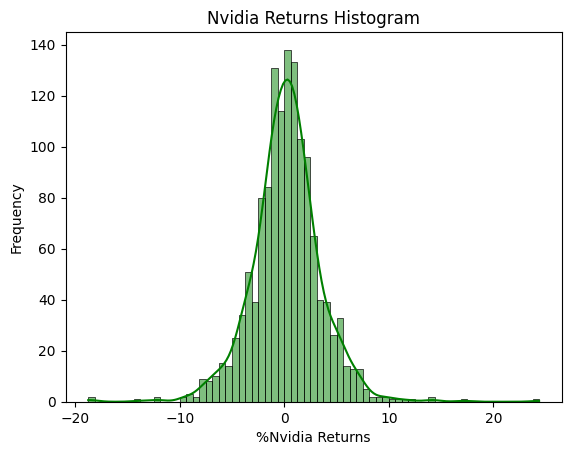

In [ ]:
# Plotting the histogram + the Kernel Density Estimation using Seaborn
sns.histplot(data=nvdar['return'], kde = True, bins='auto', color= 'green')
plt.xlabel('%Nvidia Returns')
plt.ylabel('Frequency')
plt.title('Nvidia Returns Histogram')
#plt.savefig("nvidia hist e kde.png", dpi=200)
plt.show()

### 4.1.1 - AMD

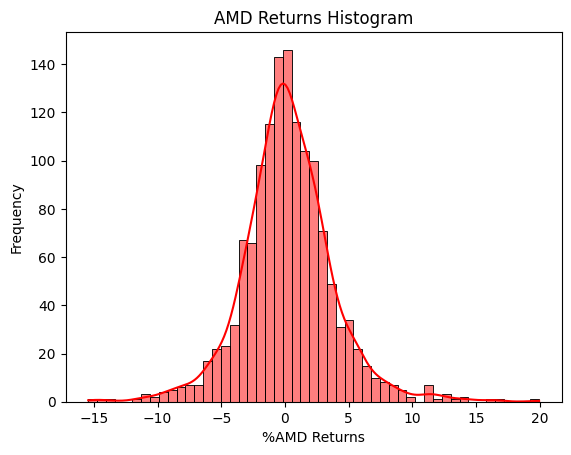

In [ ]:
sns.histplot(data=amdr['return'], kde = True, bins='auto', color= 'red')
plt.xlabel('%AMD Returns')
plt.ylabel('Frequency')
plt.title('AMD Returns Histogram')
plt.savefig("amd hist e kde.png", dpi=200)
plt.show()

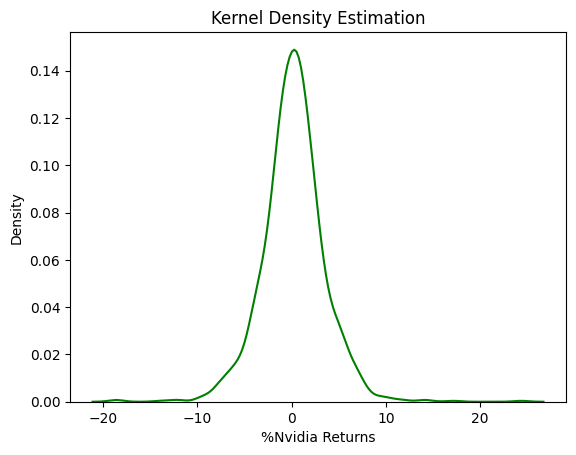

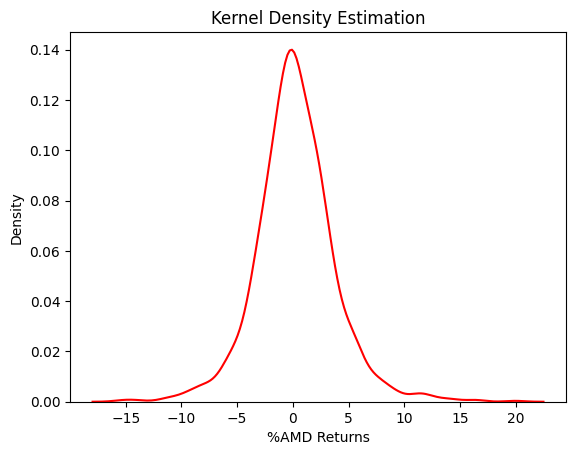

<Figure size 640x480 with 0 Axes>

In [ ]:
# Plot the KDE using Seaborn
sns.kdeplot(data=nvdar['return'], color = 'green')
plt.xlabel('%Nvidia Returns')
plt.ylabel('Density')
plt.title('Kernel Density Estimation')
plt.show()

sns.kdeplot(data=amdr['return'], color = 'red')
plt.xlabel('%AMD Returns')
plt.ylabel('Density')
plt.title('Kernel Density Estimation')
plt.show()
plt.savefig("nvidia e amd kde.png", dpi=200)



## 4.2 - Skewness and Kurtosis

In [ ]:
skewness_nvda = scs.skew(nvdar['return'])# Calculating Nvidia skewness
kurtosis_nvda = scs.kurtosis(nvdar['return'])# Calculating Nvidia kurtosis
print("Nvidia Skewness:", skewness_nvda)
print("Nvidia Kurtosis:", kurtosis_nvda)

skewness_amd = scs.skew(amdr['return'])# Calculating AMD skewness
kurtosis_amd = scs.kurtosis(amdr['return'])# Calculating AMD kurtosis
print("AMD Skewness:", skewness_amd)
print("AMD Kurtosis:", kurtosis_amd)

Nvidia Skewness: 0.11518647324363827
Nvidia Kurtosis: 4.732184397994275
AMD Skewness: 0.33330338472315646
AMD Kurtosis: 2.8476475339826086


## 4.3 - Returns descriptive measures

In [ ]:
print(nvdar['return'].describe())
print(amdr['return'].describe())

count    1358.000000
mean        0.205410
std         3.318656
min       -18.755843
25%        -1.517570
50%         0.266964
75%         1.964408
max        24.369624
Name: return, dtype: float64
count    1358.000000
mean        0.239283
std         3.558179
min       -15.445372
25%        -1.734646
50%         0.071369
75%         2.120271
max        19.948053
Name: return, dtype: float64


## 4.4 - Normality tests

### 4.4.1 - Shapiro-Wilk test

In [ ]:
# Perform the Shapiro-Wilk test
stat_nvda, p_value_nvda = scs.shapiro(nvdar['return'])

print("Shapiro-Wilk test statistic(Nvidia):", stat_nvda)
print("p-value(Nvidia):", p_value_nvda)

stat_amd, p_value_amd = scs.shapiro(amdr['return'])

print("Shapiro-Wilk test statistic(AMD):", stat_amd)
print("p-value(AMD):", p_value_amd)
# como o p-valor nos 2 casos é muito pequeno, a qualquer nível de significância, rejeitamos a hipótese de normalidade das distribuições dos retornos.

Shapiro-Wilk test statistic(Nvidia): 0.9582787752151489
p-value(Nvidia): 2.8777755682387615e-19
Shapiro-Wilk test statistic(AMD): 0.9653613567352295
p-value(AMD): 1.7240870913522327e-17


### 4.4.2 - Anderson–Darling test

In [ ]:
# Perform the Anderson-Darling test
nvdar_anderson = scs.anderson(nvdar['return'], dist = 'norm')

print("Nvidia Anderson-Darling statistic:", nvdar_anderson.statistic)
print("Nvidia Critical values:", nvdar_anderson.critical_values)
print("Nvidia Significance levels:", nvdar_anderson.significance_level)

amdr_anderson = scs.anderson(amdr['return'], dist = 'norm')

print("AMD Anderson-Darling statistic:", amdr_anderson.statistic)
print("AMD Critical values:", amdr_anderson.critical_values)
print("AMD Significance levels:", amdr_anderson.significance_level)
# conclusion reject H0

Nvidia Anderson-Darling statistic: 8.597509031385925
Nvidia Critical values: [0.574 0.654 0.785 0.915 1.089]
Nvidia Significance levels: [15.  10.   5.   2.5  1. ]
AMD Anderson-Darling statistic: 9.799201568787566
AMD Critical values: [0.574 0.654 0.785 0.915 1.089]
AMD Significance levels: [15.  10.   5.   2.5  1. ]


### 4.4.3 - Kolmogorov-Smirnov test

In [ ]:
# Nvidia test 1
nvdar_kstest1 = scs.kstest(rvs = nvdar['return'], cdf = 'norm', alternative='two-sided')
print('Nvidia kstest1 pvalue = ', nvdar_kstest1.pvalue)
# Nvidia test 2
nvdar_cdf = scs.norm(np.mean(nvdar['return']), np.std(nvdar['return'], ddof = 1)).cdf # ddo=1 makes the unbiased std estimator
nvdar_kstest2 = scs.kstest(rvs = nvdar['return'], cdf = nvdar_cdf, alternative='two-sided')
print('Nvidia kstest2 pvalue = ', nvdar_kstest2.pvalue)
# AMD test 1
amdr_kstest1 = scs.kstest(rvs = amdr['return'], cdf = 'norm', alternative='two-sided')
print('AMD kstest pvalue = ', amdr_kstest1.pvalue)
# Nvidia test 2
amdr_cdf = scs.norm(np.mean(amdr['return']), np.std(amdr['return'], ddof = 1)).cdf # ddo=1 makes the unbiased std estimator
amdr_kstest2 = scs.kstest(rvs = amdr['return'], cdf = amdr_cdf, alternative='two-sided')
print('AMD kstest2 pvalue = ', amdr_kstest2.pvalue)

Nvidia kstest1 pvalue =  5.1509412918051125e-70
Nvidia kstest2 pvalue =  0.0006396812406423585
AMD kstest pvalue =  2.6500183146528754e-78
AMD kstest2 pvalue =  0.00023877785060945266


### 4.4.4 - Scipy.stats normality test

In [ ]:
# test based on D’Agostino and Pearson’s tests that combines skew and kurtosis to produce an omnibus test of normality.

nvda_normaltest = scs.normaltest(nvdar['return'])
print('Nvidia normal test pvalue = ', nvda_normaltest.pvalue)
if nvda_normaltest.pvalue < 0.05:
  print('Conclusion: Reject H0')
else:
  print("Conclusion: Can't reject H0")


amd_normaltest = scs.normaltest(amdr['return'])
print('AMD normal test pvalue = ', amd_normaltest.pvalue)
if amd_normaltest.pvalue < 0.05:
  print('Conclusion: Reject H0')
else:
  print("Conclusion: Can't reject H0")

Nvidia normal test pvalue =  5.837889873847916e-34
Conclusion: Reject H0
AMD normal test pvalue =  8.814179104863207e-27
Conclusion: Reject H0


### 4.4.5 - Normal fit test

#### 4.4.5.1 - Nvidia

In [ ]:
nvdar_gof_norm = scs.goodness_of_fit(dist = scs.norm, data = nvdar['return'], statistic='ad')

p value = 0.0001
Therefore, reject H0


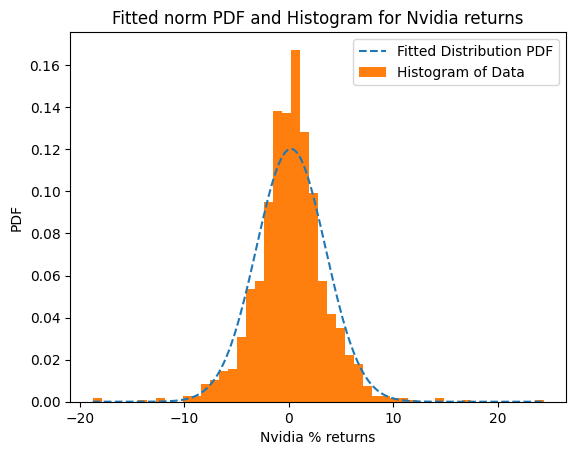

In [ ]:
print('p value =', nvdar_gof_norm.pvalue)
if nvdar_gof_norm.pvalue > 0.05:
  print('Therefore, caannot reject H0')
else:
  print('Therefore, reject H0')

#plotting dist fit graph
nvdar_gof_norm.fit_result.plot()
plt.xlabel('Nvidia % returns')
plt.title('Fitted norm PDF and Histogram for Nvidia returns')
plt.legend()
plt.show()


#### 4.4.5.2 - AMD

In [ ]:
amdr_gof_norm = scs.goodness_of_fit(dist = scs.norm, data = amdr['return'], statistic='ad')

p value = 0.0001
Therefore, reject H0


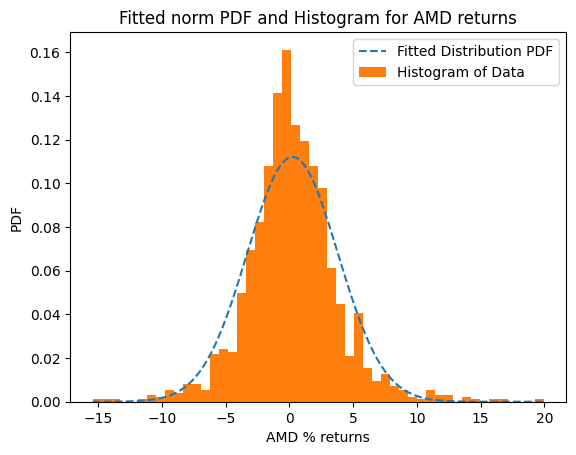

In [ ]:
print('p value =', amdr_gof_norm.pvalue)
if amdr_gof_norm.pvalue > 0.05:
  print('Therefore, caannot reject H0')
else:
  print('Therefore, reject H0')

#plotting dist fit graph
amdr_gof_norm.fit_result.plot()
plt.xlabel('AMD % returns')
plt.title('Fitted norm PDF and Histogram for AMD returns')
plt.legend()
plt.show()

## 4.5 - So... What is the underlying distribution?

Using the 'scipy.stats.goodness_of_fit()' function which uses a generalized Monte Carlo goodness-of-fit procedure also called a parametric bootstrap test.

### 4.5.1 - Estimation and test samples

Here we're creating estimation and test samples, so we can get the aproximated t distribution for the estimation sample. This way we can calculate the VaR assuming this distribution and after perform a binomial test using both the VaR calculated on the estimation sample and the test sample.

In [ ]:
# Randomizing the order of rows in the DataFrames to avoid any potencial bias
rng_nvdar = nvdar.sample(frac=1, random_state=599)
rng_amdr = amdr.sample(frac=1, random_state=599)

# Calculating the index to split the DataFrames
split_index = int(0.5 * len(rng_nvdar)) # len(nvdar) == len(amdr) --> len(rng_nvdar) == len(rng_amdr)

# Creating estimation samples
rng_nvdar_est = rng_nvdar[:split_index]
rng_amdr_est = rng_amdr[:split_index]

# Creating test samples
rng_nvdar_test = rng_nvdar[split_index:]
rng_amdr_test = rng_amdr[split_index:]


### 4.5.2 - T fit test

WARNING: the lines in this section can take several minutes (maybe hours) to run.

#### 4.5.2.1 - Nvidia

In [ ]:
nvdar_gof_t = scs.goodness_of_fit(dist = scs.t, data = nvdar['return'], statistic='ad', random_state=599)

p value = 0.3884
Therefore, cannot reject H0


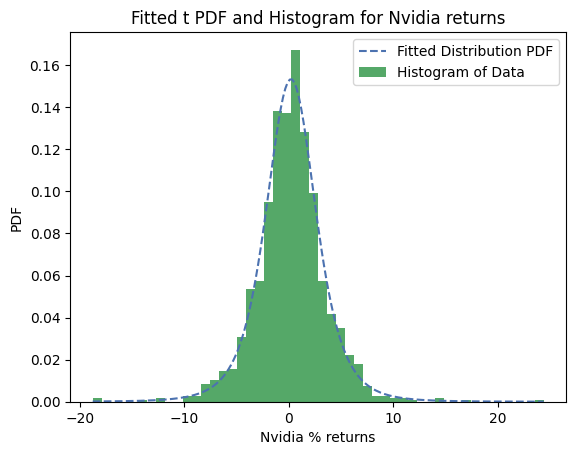

In [ ]:
print('p value =', nvdar_gof_t.pvalue)
if nvdar_gof_t.pvalue > 0.05:
  print('Therefore, cannot reject H0')
else:
  print('Therefore, reject H0')

#plotting dist fit graph
nvdar_gof_t.fit_result.plot()
plt.xlabel('Nvidia % returns')
plt.title('Fitted t PDF and Histogram for Nvidia returns')
plt.legend()
plt.savefig("nvidia t est.png", dpi=200)
plt.show()

In [ ]:
print(nvdar_gof_t.fit_result.params)

FitParams(df=4.334483846801729, loc=0.20763321747302296, scale=2.4566412271016405)


#### 4.5.2.2 - AMD

In [ ]:
amdr_gof_t = scs.goodness_of_fit(dist = scs.t, data = amdr['return'], statistic='ad', random_state=599)

p value = 0.1397
Therefore, cannot reject H0


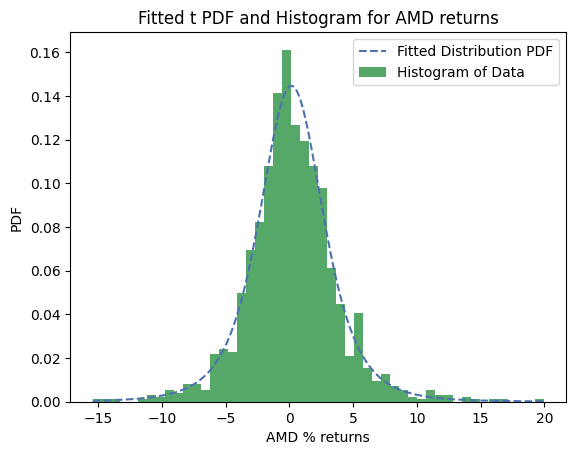

In [ ]:
print('p value =', amdr_gof_t.pvalue)
if amdr_gof_t.pvalue > 0.05:
  print('Therefore, cannot reject H0')
else:
  print('Therefore, reject H0')

#plotting dist fit graph
amdr_gof_t.fit_result.plot()
plt.xlabel('AMD % returns')
plt.title('Fitted t PDF and Histogram for AMD returns')
plt.legend()
plt.savefig("amd t est.png", dpi=200)
plt.show()

In [ ]:
print(amdr_gof_t.fit_result.params)

FitParams(df=4.003093616542912, loc=0.15229170698066175, scale=2.5905119812643935)


#### 4.5.2.3 - Nvidia Estimation Sample

In [ ]:
rng_nvdar_est_gof_t = scs.goodness_of_fit(dist = scs.t, data = rng_nvdar_est['return'], statistic='ad', random_state=599)

p value = 0.177
Therefore, cannot reject H0


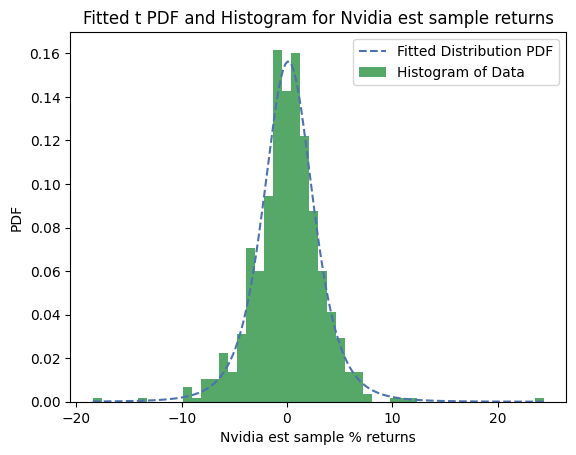

In [ ]:
print('p value =', rng_nvdar_est_gof_t.pvalue)
if rng_nvdar_est_gof_t.pvalue > 0.05:
  print('Therefore, cannot reject H0')
else:
  print('Therefore, reject H0')

#plotting dist fit graph
rng_nvdar_est_gof_t.fit_result.plot()
plt.xlabel('Nvidia est sample % returns')
plt.title('Fitted t PDF and Histogram for Nvidia est sample returns')
plt.legend()
plt.show()

In [ ]:
print(rng_nvdar_est_gof_t.fit_result.params)

FitParams(df=4.54240632995891, loc=0.12336123161269108, scale=2.416670206990644)


#### 4.5.2.4 - AMD Estimation Sample

In [ ]:
rng_amdr_est_gof_t = scs.goodness_of_fit(dist = scs.t, data = rng_amdr_est['return'], statistic='ad', random_state=599)

p value = 0.7544
Therefore, cannot reject H0


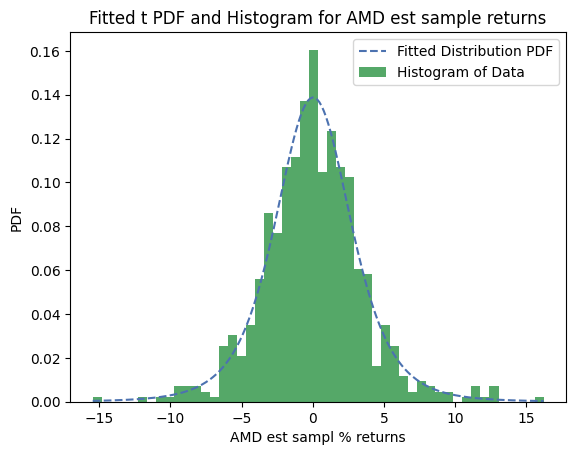

In [ ]:
print('p value =', rng_amdr_est_gof_t.pvalue)
if rng_amdr_est_gof_t.pvalue > 0.05:
  print('Therefore, cannot reject H0')
else:
  print('Therefore, reject H0')

#plotting dist fit graph
rng_amdr_est_gof_t.fit_result.plot()
plt.xlabel('AMD est sampl % returns')
plt.title('Fitted t PDF and Histogram for AMD est sample returns')
plt.legend()
plt.show()

In [ ]:
print(rng_amdr_est_gof_t.fit_result.params)

FitParams(df=4.729348942542126, loc=0.02580789261302804, scale=2.727587117861113)


# 5 - Value at Risk

## 5.1 - Historical VaR

Perfoming the calculation on the estimation sample, so we can back test it later.

In [ ]:
confidence_level = 0.95
# Calculating the Historical VaR
nvdar_hist_var = np.percentile(rng_nvdar_est['return'], (1 - confidence_level) * 100)
amdr_hist_var = np.percentile(rng_amdr_est['return'], (1 - confidence_level) * 100)

# Printing results
print("Nvidia's Historical VaR at", confidence_level * 100, "% confidence level:", '{:.4f}%'.format(nvdar_hist_var))
print("AMD's Historical VaR at", confidence_level * 100, "% confidence level:", '{:.4f}%'.format(amdr_hist_var))

Nvidia's Historical VaR at 95.0 % confidence level: -5.5695%
AMD's Historical VaR at 95.0 % confidence level: -5.4705%


## 5.2 - Gaussian VaR

Perfoming the calculation on the estimation sample, so we can back test it later.

In [ ]:
confidence_level = 0.95

# Calculating the mean and standard deviation of returns
rng_nvdar_est_mean = np.mean(rng_nvdar_est['return'])
rng_nvdar_est_std = np.std(rng_nvdar_est['return'], ddof=1)
rng_amdr_est_mean = np.mean(rng_amdr_est['return'])
rng_amdr_est_std = np.std(rng_amdr_est['return'], ddof=1)

# Calculating the Gaussian VaR
nvdar_gaussian_var = rng_nvdar_est_mean + scs.norm.ppf(1 - confidence_level) * rng_nvdar_est_std
amdr_gaussian_var = rng_amdr_est_mean + scs.norm.ppf(1 - confidence_level) * rng_amdr_est_std

# Printing results
print("Nvidia's Gaussian VaR at", confidence_level * 100, "% confidence level:", '{:.4f}%'.format(nvdar_gaussian_var))
print("AMD's Gaussian VaR at", confidence_level * 100, "% confidence level:", '{:.4f}%'.format(amdr_gaussian_var))

Nvidia's Gaussian VaR at 95.0 % confidence level: -5.3046%
AMD's Gaussian VaR at 95.0 % confidence level: -5.7458%


## 5.3 - T VaR

The calculations below assume that the returns follow the t-student distribution estimated in the section 'T fit test'.

### 5.3.1 - Nvidia

In [ ]:
#est sample t VaR
# parameters of the t-distribution estimated previously
rng_nvdar_est_t_df = rng_nvdar_est_gof_t.fit_result.params.df  # Degrees of freedom
rng_nvdar_est_t_loc =rng_nvdar_est_gof_t.fit_result.params.loc
rng_nvdar_est_t_scale = rng_nvdar_est_gof_t.fit_result.params.scale

confidence_level = 0.95

# Calculate the quantile of the t-distribution with custom parameters
rng_nvdar_est_t_quantile = scs.t.ppf(confidence_level, df=rng_nvdar_est_t_df, loc=rng_nvdar_est_t_loc, scale=rng_nvdar_est_t_scale)

# Compute the VaR assuming a t-distribution with custom parameters
nvdar_t_var = -rng_nvdar_est_t_quantile

print("Nvidia's estimated t-distribution VaR (95% confidence level):", '{:.4f}%'.format(rng_nvdar_est_t_var))


Nvidia's estimated t-distribution VaR (95% confidence level): -5.1036%


### 5.3.2 - AMD

In [ ]:
#est sample t VaR
# parameters of the t-distribution estimated previously
rng_amdr_est_t_df = rng_amdr_est_gof_t.fit_result.params.df  # Degrees of freedom
rng_amdr_est_t_loc = rng_amdr_est_gof_t.fit_result.params.loc
rng_amdr_est_t_scale = rng_amdr_est_gof_t.fit_result.params.scale

confidence_level = 0.95

# Calculate the quantile of the t-distribution with custom parameters
rng_amdr_est_t_quantile = scs.t.ppf(confidence_level, df=rng_amdr_est_t_df, loc=rng_amdr_est_t_loc, scale=rng_amdr_est_t_scale)

# Compute the VaR assuming a t-distribution with custom parameters
amdr_t_var = -rng_amdr_est_t_quantile

print("AMD estimated t-distribution VaR (95% confidence level):", '{:.4f}%'.format(amdr_t_var))


AMD estimated t-distribution VaR (95% confidence level): -5.5923%


## 5.4 - Comparing different methods through the binomial test

In [ ]:
# binomial test
scs.binomtest(k, n, p=0.5, alternative='two-sided')
# k=sum((rng_stock_test<sotckr_metod_var)*1)/len(rng_stock_test), n=len(rng_stock_test), p=0.05

### 5.4.1 - Historical VaR Binomial Test

#### 5.4.1.1 - Nvidia

In [ ]:
# Number of successes, meaning how many values are equal or below the historical VaR
n_viol_rng_nvdar_test_hist_var = int((rng_nvdar_test <= nvdar_hist_var).sum())

# Binomial test
nvdar_hist_var_bint = scs.binomtest(k = n_viol_rng_nvdar_test_hist_var, n = len(rng_nvdar_test), p = 0.05, alternative = 'two-sided')

print('p value =', nvdar_hist_var_bint.pvalue)
if nvdar_hist_var_bint.pvalue > 0.05:
  print('Therefore, cannot reject H0')
else:
  print('Therefore, reject H0')

p value = 0.09330448083882807
Therefore, cannot reject H0


#### 5.4.1.2 - AMD

In [ ]:
# Number of successes, meaning how many values are equal or below the historical VaR
n_viol_rng_amdr_test_hist_var = int((rng_amdr_test <= amdr_hist_var).sum())

# Binomial test
amdr_hist_var_bint = scs.binomtest(k = n_viol_rng_amdr_test_hist_var, n = len(rng_amdr_test), p = 0.05, alternative = 'two-sided')

print('p value =', amdr_hist_var_bint.pvalue)
if amdr_hist_var_bint.pvalue > 0.05:
  print('Therefore, cannot reject H0')
else:
  print('Therefore, reject H0')

p value = 0.1857797313679309
Therefore, cannot reject H0


### 5.4.2 - Gaussian VaR Binomial Test

#### 5.4.2.1 - Nvidia

In [ ]:
# Number of successes, meaning how many values are equal or below the Gaussian VaR
n_viol_rng_nvdar_test_gaus_var = int((rng_nvdar_test <= nvdar_gaussian_var).sum())

# Binomial test
nvdar_gaus_var_bint = scs.binomtest(k = n_viol_rng_nvdar_test_gaus_var, n = len(rng_nvdar_test), p = 0.05, alternative = 'two-sided')

print('p value =', nvdar_gaus_var_bint.pvalue)
if nvdar_gaus_var_bint.pvalue > 0.05:
  print('Therefore, cannot reject H0')
else:
  print('Therefore, reject H0')

p value = 0.13344221125365657
Therefore, cannot reject H0


#### 5.4.2.2 - AMD

In [ ]:
# Number of successes, meaning how many values are equal or below the Gaussian VaR
n_viol_rng_amdr_test_gaus_var = int((rng_amdr_test <= amdr_gaussian_var).sum())

# Binomial test
amdr_gaus_var_bint = scs.binomtest(k = n_viol_rng_amdr_test_gaus_var, n = len(rng_amdr_test), p = 0.05, alternative = 'two-sided')

print('p value =', amdr_gaus_var_bint.pvalue)
if amdr_gaus_var_bint.pvalue > 0.05:
  print('Therefore, cannot reject H0')
else:
  print('Therefore, reject H0')

p value = 0.13344221125365657
Therefore, cannot reject H0


### 5.4.3 - T VaR Binomial Test

#### 5.4.3.1 - Nvidia

In [ ]:
# Number of successes, meaning how many values are equal or below the t VaR
n_viol_rng_nvdar_test_t_var = int((rng_nvdar_test <= nvdar_t_var).sum())

# Binomial test
nvdar_t_var_bint = scs.binomtest(k = n_viol_rng_nvdar_test_t_var, n = len(rng_nvdar_test), p = 0.05, alternative = 'two-sided')

print('p value =', nvdar_t_var_bint.pvalue)
if nvdar_t_var_bint.pvalue > 0.05:
  print('Therefore, cannot reject H0')
else:
  print('Therefore, reject H0')

p value = 0.13344221125365657
Therefore, cannot reject H0


#### 5.4.3.2 - AMD

In [ ]:
# Number of successes, meaning how many values are equal or below the Gaussian VaR
n_viol_rng_amdr_test_t_var = int((rng_amdr_test <= amdr_t_var).sum())

# Binomial test
amdr_t_var_bint = scs.binomtest(k = n_viol_rng_amdr_test_t_var, n = len(rng_amdr_test), p = 0.05, alternative = 'two-sided')

print('p value =', amdr_t_var_bint.pvalue)
if amdr_t_var_bint.pvalue > 0.05:
  print('Therefore, cannot reject H0')
else:
  print('Therefore, reject H0')

p value = 0.1857797313679309
Therefore, cannot reject H0


# 6 - Efficient Frontier


In [ ]:
#  Calculating the expected returns and sample covariance
mu = expected_returns.mean_historical_return(stocks)
cov_matrix = risk_models.risk_matrix(stocks, method='sample_cov')
#print(mu)
#print(cov_matrix)

## 6.1 - Short Selling

Short selling will be defined to the EfficientFrontier function by the 'weight_bounds=(None, None)' arg.



### 6.1.1 - Efficient Frontier plot

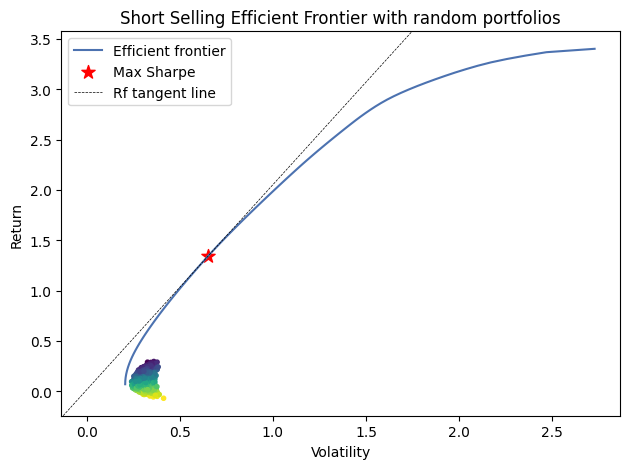

In [ ]:
# Plotting the efficient frontier
short_selling_ef = EfficientFrontier(expected_returns = mu, cov_matrix = cov_matrix, weight_bounds=(None, None))
fig, ax = plt.subplots()
short_selling_ef_max_sharpe = short_selling_ef.deepcopy()
plotting.plot_efficient_frontier(short_selling_ef, ax=ax, show_assets=False)

# Finding the tangency portfolio
short_selling_ef_max_sharpe.max_sharpe(risk_free_rate = rf['close'].mean())
ret_tangent, std_tangent, _ = short_selling_ef_max_sharpe.portfolio_performance(risk_free_rate = rf['close'].mean())
ax.scatter(std_tangent, ret_tangent, marker="*", s=100, c="r", label="Max Sharpe")

# Generating random portfolios
n_samples = 10000
w = np.random.dirichlet(np.ones(short_selling_ef.n_assets), n_samples)
rets = w.dot(short_selling_ef.expected_returns)
stds = np.sqrt(np.diag(w @ short_selling_ef.cov_matrix @ w.T))
sharpes = (rets - rf['close'].mean()) / stds
ax.scatter(stds, rets, marker=".", c=sharpes, cmap="viridis_r")

# Rf tangent line
#ax.axline(xy1 = (0, rf['close'].mean()), xy2=(std_tangent, ret_tangent), color = 'black', label = 'Rf tangent line', linewidth=0.5, linestyle = 'dashed')

# Output
ax.set_title("Short Selling Efficient Frontier with random portfolios")
ax.legend()
plt.tight_layout()
#plt.savefig("short_selling_ef_scatter.png", dpi=200)
plt.show()

### 6.1.2 - Max Sharpe portifolio measures

In [ ]:
# Creating new ef objetct due to lib limitations
short_selling_ef2 = EfficientFrontier(expected_returns = mu, cov_matrix = cov_matrix, weight_bounds=(None, None))
# Solving for max Sharpe
short_selling_ef2.max_sharpe(risk_free_rate = rf['close'].mean())
# Getting the optimals portifolio's weight
short_selling_cleaned_weights = short_selling_ef2.clean_weights()
print(short_selling_cleaned_weights)
# Getting optimals portifolio's Expected annual return, Annual volatility and Sharpe Ratio
short_selling_ef2.portfolio_performance(verbose=True, risk_free_rate = rf['close'].mean())

OrderedDict([('AAPL', 1.0), ('AMD', 0.51021), ('AMZN', -0.59282), ('BAC', -0.51615), ('CCL', -0.34031), ('CMCSA', 0.13153), ('DIS', -0.28476), ('F', 0.28594), ('GM', -0.19481), ('GOOGL', 0.03386), ('GPS', -0.25364), ('INTC', -1.0), ('JPM', 1.0), ('MRVL', -0.23183), ('MSFT', 1.0), ('MU', -0.11353), ('NFLX', -0.15324), ('NVDA', 0.34387), ('T', 0.11386), ('TSLA', 0.26183)])
Expected annual return: 134.6%
Annual volatility: 65.3%
Sharpe Ratio: 2.04


(1.345645843086631, 0.6532012608885522, 2.0368544095711076)

## 6.2 - Long Only

Short selling will be defined to the EfficientFrontier function by the 'weight_bounds=(0, 1)' arg.

### 6.2.1 - Efficient Frontier plot

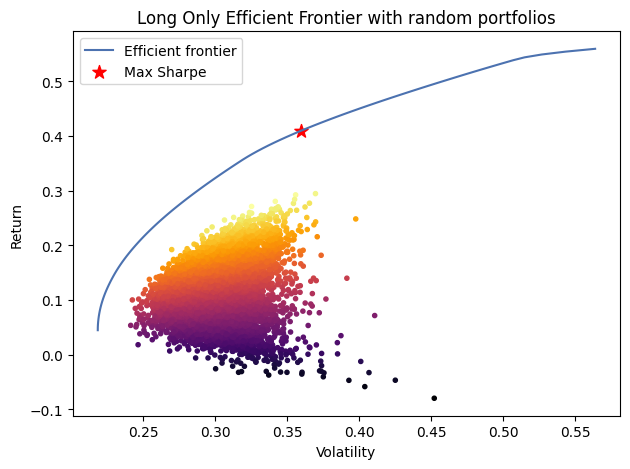

In [ ]:
# Ploting the efficient frontier
long_only_ef = EfficientFrontier(expected_returns = mu, cov_matrix = cov_matrix, weight_bounds=(0, 1))
fig, ax = plt.subplots()
long_only_ef_max_sharpe = long_only_ef.deepcopy()
plotting.plot_efficient_frontier(long_only_ef, ax=ax, show_assets=False)

# Finding the tangency portfolio
long_only_ef_max_sharpe.max_sharpe(risk_free_rate = rf['close'].mean())
ret_tangent, std_tangent, _ = long_only_ef_max_sharpe.portfolio_performance(risk_free_rate = rf['close'].mean())
ax.scatter(std_tangent, ret_tangent, marker="*", s=100, c="r", label="Max Sharpe")

# Generating random portfolios
n_samples = 10000
w = np.random.dirichlet(np.ones(long_only_ef.n_assets), n_samples)
rets = w.dot(long_only_ef.expected_returns)
stds = np.sqrt(np.diag(w @ long_only_ef.cov_matrix @ w.T))
sharpes = (rets - rf['close'].mean()) / stds
ax.scatter(stds, rets, marker=".", c=sharpes, cmap="inferno")

# Rf tangent line
#ax.axline(xy1 = (0, rf['close'].mean()), xy2=(std_tangent, ret_tangent), color = 'black', label = 'Rf tangent line', linewidth=0.5, linestyle = 'dashed')


# Output
ax.set_title("Long Only Efficient Frontier with random portfolios")
ax.legend()
plt.tight_layout()
plt.savefig("long_only_ef_scatter.png", dpi=200)
plt.show()

### 6.2.2 - Max Sharpe portifolio measures

In [ ]:
 # Creating new ef objetct due to lib limitations
long_only_ef2 = EfficientFrontier(expected_returns = mu, cov_matrix = cov_matrix, weight_bounds=(0, 1))
# Solving for max Sharpe
long_only_ef2.max_sharpe(risk_free_rate = rf['close'].mean())
# Getting the optimals portifolio's weight
long_only_cleaned_weights = long_only_ef2.clean_weights()
print(long_only_cleaned_weights)
# Getting optimals portifolio's Expected annual return, Annual volatility and Sharpe Ratio
long_only_ef2.portfolio_performance(verbose=True, risk_free_rate = rf['close'].mean())

OrderedDict([('AAPL', 0.2478), ('AMD', 0.32399), ('AMZN', 0.0), ('BAC', 0.0), ('CCL', 0.0), ('CMCSA', 0.0), ('DIS', 0.0), ('F', 0.0), ('GM', 0.0), ('GOOGL', 0.0), ('GPS', 0.0), ('INTC', 0.0), ('JPM', 0.0), ('MRVL', 0.0), ('MSFT', 0.29871), ('MU', 0.0), ('NFLX', 0.0), ('NVDA', 0.0), ('T', 0.0), ('TSLA', 0.12951)])
Expected annual return: 41.0%
Annual volatility: 36.0%
Sharpe Ratio: 1.10


(0.4095155798081535, 0.35983638911173593, 1.095902519123284)

# 7 - CAPM

## 7.1 - Daily Risk Free Rate

In [ ]:
rf['daily'] = (1 + rf['close'])**(1/252) - 1
#rf

## 7.2 - Stocks' Excess Returns

In [ ]:
print(len(rf) == len(stocksr))
# rf has more observations

False


In [ ]:
# converting index to merge
rf.index = pd.to_datetime(rf.index)
#print(rf.index.dtype)

In [ ]:
#merging dfs
rf_stocks = pd.merge(stocksr, rf, left_index=True, right_index=True, how='inner')
#rf_stocks

In [ ]:
# Creating the excess returns df for the stocks
stocks_excessr = rf_stocks[stocksr.columns].subtract(rf_stocks['daily'], axis=0)
#stocks_excessr

## 7.3 - S&P 500 Excess Returns

In [ ]:
print(len(rf) == len(sp500r))
# Same problem as (7.2)

False


In [ ]:
# merging dfs
rf_sp500 = pd.merge(sp500r, rf, left_index=True, right_index=True, how='inner')
rf_sp500

,Adj Close,close,daily
2018-01-03,0.006399,0.014100,0.000056
2018-01-04,0.004029,0.014100,0.000056
2018-01-05,0.007034,0.014100,0.000056
2018-01-08,0.001662,0.014100,0.000056
2018-01-09,0.001303,0.014100,0.000056
...,...,...,...
2023-05-19,-0.001446,0.050575,0.000196
2023-05-22,0.000155,0.050575,0.000196
2023-05-23,-0.011222,0.050575,0.000196
2023-05-24,-0.007319,0.050575,0.000196


In [ ]:
# Creating the excess returns df for the stocks
sp500_excessr = pd.DataFrame(rf_sp500['Adj Close'].subtract(rf_stocks['daily'], axis=0), columns={'return' : 'as'})
#sp500_excessr

## 7.4 - Estimation

In [ ]:
capm_results = pd.DataFrame()
for i in stocks_excessr.columns:
  res = scs.linregress(x = stocks_excessr[i], y = sp500_excessr['return'], alternative='two-sided')
  capm_results[i] = [res.intercept, res.slope, res.pvalue]

capm_results.index = ['alpha', 'beta', 'beta pvalue']
capm_results

,AAPL,AMD,AMZN,BAC,CCL,CMCSA,DIS,F,GM,GOOGL,GPS,INTC,JPM,MRVL,MSFT,MU,NFLX,NVDA,T,TSLA
alpha,-2.991808e-04,-1.873908e-04,7.561359e-05,2.410832e-04,4.064327e-04,2.709290e-04,3.483676e-04,2.155889e-04,2.813738e-04,-4.943018e-05,4.005355e-04,3.728185e-04,1.299199e-04,5.566352e-05,-0.000331,1.301399e-04,1.530941e-04,-2.229224e-04,3.860687e-04,-2.640112e-05
beta,5.237797e-01,2.294333e-01,3.977501e-01,4.530502e-01,1.698946e-01,4.929524e-01,4.511162e-01,3.108642e-01,3.320129e-01,5.291120e-01,1.878503e-01,3.898815e-01,5.027583e-01,3.041814e-01,0.583644,3.015884e-01,2.333933e-01,2.893285e-01,4.676632e-01,1.579315e-01
beta pvalue,7.116875e-305,1.170470e-135,4.233027e-174,2.026307e-235,2.433918e-106,1.509826e-167,1.081804e-187,9.437653e-136,1.488495e-159,1.802303e-280,1.642355e-94,5.507370e-192,4.818570e-238,4.386529e-181,0.000000,1.885315e-175,7.840820e-92,8.868847e-209,1.398880e-113,2.683003e-79


## 7.5 - Nvidia

In [ ]:
print('Nvidia alpha is =', capm_results.loc['alpha', 'NVDA'])
print('Nvidia beta is =', capm_results.loc['beta', 'NVDA'])
print("The H0 referent to beta's pvalue is that beta equals 0")
print('Nvidia beta pvalue is =', capm_results.loc['beta pvalue', 'NVDA'])
if capm_results.loc['beta pvalue', 'NVDA'] > 0.05:
  print('cannot reject H0')
else:
  print('reject H0')


Nvidia alpha is = -0.00022292237558387234
Nvidia beta is = 0.2893285240487832
The H0 referent to beta's pvalue is that beta equals 0
Nvidia beta pvalue is = 8.868847103170861e-209
reject H0


## 7.6 - AMD

In [ ]:
print('AMD alpha is =', capm_results.loc['alpha', 'AMD'])
print('AMD beta is =', capm_results.loc['beta', 'AMD'])
print("The H0 referent to beta's pvalue is that beta equals 0")
print('AMD beta pvalue is =', capm_results.loc['beta pvalue', 'AMD'])
if capm_results.loc['beta pvalue', 'AMD'] > 0.05:
  print('cannot reject H0')
else:
  print('reject H0')

AMD alpha is = -0.00018739077655643564
AMD beta is = 0.2294333401302221
The H0 referent to beta's pvalue is that beta equals 0
AMD beta pvalue is = 1.1704704499387793e-135
reject H0


## 7.7 - Testing CAPM

In [ ]:
# Performing the Wald test
intercepts = capm_results.loc['alpha',].values

n_params = len(intercepts)
null_hypothesis = 0  # H0: intercepts = 0

# Calculating the estimated variances of the intercepts
var_estimates = np.var(intercepts)

# Calculating the Wald test statistic
test_statistic = np.sum((intercepts - null_hypothesis)**2) / var_estimates

# Calculating the p-value using the chi-square distribution
p_value = 1 - scs.chi2.cdf(test_statistic, df=n_params)

# Printing the results
print("Wald test statistic:", test_statistic)
print("Degrees of freedom:", n_params)
print("p-value:", p_value)
if p_value > 0.05:
  print('Therefore, cannot reject H0. CAPM model is valid.')
else:
  print('Therefore, reject H0. CAPM model isnt valid.')

Wald test statistic: 25.17518217982743
Degrees of freedom: 20
p-value: 0.19481108115755164
Therefore, cannot reject H0. CAPM model is valid.
